In [2]:
import idx2numpy

# Reading
ndarr = idx2numpy.convert_from_file('data\t10k-images\t10k-images.idx3-ubyte')

f_read = open('myfile.idx', 'rb')
ndarr = idx2numpy.convert_from_file(f_read)

s = f_read.read()
ndarr = idx2numpy.convert_from_string(s)

# Writing 
idx2numpy.convert_to_file('myfile_copy.idx', ndarr)

f_write = open('myfile_copy2.idx', 'w')
idx2numpy.convert_to_file(f_write, ndarr)

s = convert_to_string(ndarr)

OSError: [Errno 22] Invalid argument: 'data\t10k-images\t10k-images.idx3-ubyte'

In [1]:
from tensorflow.examples.tutorials.mnist import input_data
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.sparse

In [2]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

#Extract feature values and labels from the data
mnist_train_labels = np.array(mnist.train.labels)
mnist_train_images =  np.array(mnist.train.images)
mnist_valid_images =  np.array(mnist.validation.images)
mnist_valid_labels =  np.array(mnist.validation.labels)
mnist_test_labels =  np.array(mnist.test.labels)
mnist_test_images =  np.array(mnist.test.images)


Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [3]:
def log_likelihood(features, target, weights):
    scores = np.dot(features, weights)
    ll = np.sum( target*scores - np.log(1 + np.exp(scores)) )
    return ll 

In [4]:
num_inputs = mnist_train_images.shape[1]
num_outputs = mnist_train_labels.shape[1]
# ...
# Because our task is multiclass classification, 
# we want to assign a probability to each of the classes P(Y=c|X) given the input X. 
# In order to do this we’re going to need one vector of 784 weights for each class, 
# connecting each feature to the corresponding output. Because there are 10 classes, 
# we can collect these weights together in a 784 by 10 matrix.

# We’ll also want to allocate one offset for each of the outputs. 
# We call these offsets the bias term and collect them in the 10-dimensional array b
# ...

W = np.random.rand(num_inputs, num_outputs)
b = np.random.rand(num_outputs)

params = [W, b]

In [6]:
example = mnist_train_images[100]
mnist_train_images.shape
# plt.imshow(np.reshape(example,[28,28]))

(55000, 784)

In [51]:
# ...
# Here we determine the probabilities and predictions for each class when given a set of input data
# ...
def getProbsAndPreds(someX):
    probs = softmax(np.dot(someX,w))
    preds = np.argmax(probs,axis=1)
    return probs,preds


In [52]:
# ...
# Here we perform the softmax transformation: This allows us to get probabilities for each class score that sum to 100%.
# ...
def softmax(z):
    z -= np.max(z)
    sm = (np.exp(z).T / np.sum(np.exp(z),axis=1)).T
    #print("Returning softmax : ", sm)
    return sm

In [55]:
# ...
# Here we define the loss function for softmax regression.
# ...
def getLoss(w,x,y,lam):
    m = x.shape[0] #First we get the number of training examples    
    scores = np.dot(x,w) #Then we compute raw class scores given our input and current weights
    prob = softmax(scores) #Next we perform a softmax on these scores to get their probabilities
    loss = (-1 / m) * np.sum(y * np.log(prob)) + (lam/2)*np.sum(w*w) #We then find the loss of the probabilities
    grad = (-1 / m) * np.dot(x.T,(y - prob)) + lam*w #And compute the gradient for that loss
    return loss,grad

In [75]:
# ...
# This is the main loop of the softmax regression.
# Here we initialize our weights, regularization factor, number of iterations,
# and learning rate. We then loop over a computation of the loss and gradient,
# and application of gradient.
# ...
x = mnist_train_images
y = mnist_train_labels
w = np.zeros([x.shape[1], 10])
lam = 1
iterations = 1000
learningRate = 1e-5
losses = []
for i in range(0,iterations):
    loss,grad = getLoss(w,x,y,lam)
    losses.append(loss)
    w = w - (learningRate * grad)
print(loss)

2.29193262705


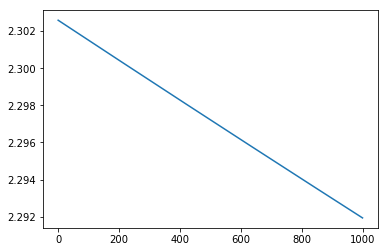

In [76]:
plt.plot(losses)

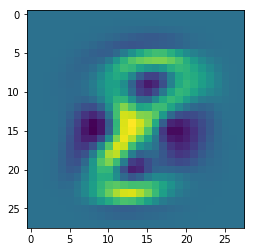

In [78]:
classWeightsToVisualize = 8
plt.imshow(scipy.reshape(w[:,classWeightsToVisualize],[28,28]))

In [73]:
ssss = np.dot(x,w)
ssss[0]

array([  3.24263422e-04,  -1.51141297e-03,   4.99163472e-04,
        -4.65792433e-05,   1.20804071e-04,  -8.63741241e-04,
         2.40774188e-04,   5.95078660e-04,   2.62136869e-04,
         3.79512769e-04])